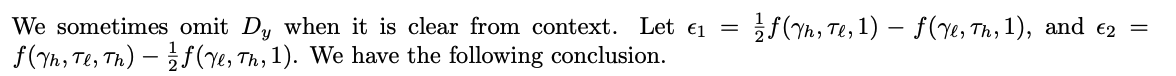

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from game.Bankgames import *
from game.plotting import *
from game.distributions import TruncatedGaussian
import nashpy as nh

In [2]:
gammas = [0.5, 0.6]
taus = [1/(2+gamma) for gamma in gammas]
tg = TruncatedGaussian(mu = 0.6, sigma = 0.2)
game_tg = GameTrueMatrix2by2(gammas=gammas, taus=taus, dist=tg)
game_tg.eps1, game_tg.eps2

(-0.23058161945446387, -0.25748629749030433)

In [3]:
game_tg.NE_theory, game_tg.NE_se

([[[0, 0, 1, 0], [0, 0, 1, 0]]],
 [(array([0., 0., 1., 0.]), array([0., 0., 1., 0.]))])

In [12]:
gammas = [0.5, 0.6]
taus = [1/(2+gamma) for gamma in gammas]
tg = TruncatedGaussian(mu = 0.6, sigma = 0.2)
pu = PiecewiseUniform()

game_tg = GameTrueMatrix(gammas=gammas, taus=taus, dist=tg)
game_pu = GameTrueMatrix(gammas=gammas, taus=taus, dist=pu) # has epsilon_1 <0, epsilon_2>0

In [15]:
# truncgauss dist
print(game_tg.NE_ve)

T = 10000
eta = 0.1

p_b1 = np.array([0., 0.01, 0.99, 0.])
p_b2 = np.array([0., 0.5, 0.3, 0.])


b1_rec, b2_rec, g,t = game_tg.run_hedge(T=T, p_b1=p_b1, p_b2=p_b2, eta=eta)
print(b1_rec[-1], b2_rec[-1])

[(array([1.43139932e-17, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00]), array([1.43139932e-17, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00]))]
[0.00000000e+000 1.68450668e-114 1.00000000e+000 0.00000000e+000] [0.00000000e+000 2.49721045e-112 1.00000000e+000 0.00000000e+000]


In [35]:
for b2,b1 in game_tg.NE_ve:
  print(np.concatenate((b2, b1)))
  

[1.43139932e-17 0.00000000e+00 1.00000000e+00 0.00000000e+00
 1.43139932e-17 0.00000000e+00 1.00000000e+00 0.00000000e+00]


In [22]:
game_pu.NE_ve[0]

(array([3.26405569e-17, 1.00000000e+00, 3.26405569e-17, 0.00000000e+00]),
 array([3.37507799e-17, 5.06261699e-17, 1.00000000e+00, 5.06261699e-17]))

In [36]:
game_pu.NE_ve[1] # mixed NE

(array([1.76305128e-17, 8.02825947e-02, 9.19717405e-01, 3.52610255e-17]),
 array([1.76305128e-17, 8.02825947e-02, 9.19717405e-01, 3.52610255e-17]))

In [38]:
tuple(game_pu.NE_ve[1][0])

(np.float64(1.7630512763690987e-17),
 np.float64(0.08028259473346279),
 np.float64(0.9197174052665371),
 np.float64(3.5261025527381975e-17))

In [25]:
game_pu.NE_ve[1][0][1] + game_pu.NE_ve[1][0][2]

np.float64(0.9999999999999999)

In [24]:
game_pu.NE_ve[2]

(array([3.37507799e-17, 5.06261699e-17, 1.00000000e+00, 5.06261699e-17]),
 array([3.26405569e-17, 1.00000000e+00, 3.26405569e-17, 0.00000000e+00]))

In [28]:
# uniform dist
# print(game_pu.NE_ve, '\n')

T = 100000
eta = 0.1

p_b1 = np.array([0., 0.1, 0.9, 0.])
p_b2 = np.array([0., 0.5, 0.3, 0.])


b1_rec, b2_rec, g,t = game_pu.run_hedge(T=T, p_b1=p_b1, p_b2=p_b2, eta=eta)
print(b1_rec[-1], b2_rec[-1])

[0.00000000e+00 7.22207234e-30 1.00000000e+00 0.00000000e+00] [0.         0.99860184 0.00139816 0.        ]


In [11]:
b1_rec[-1], b2_rec[-1]

(array([0.00000000e+000, 1.68450668e-114, 1.00000000e+000, 0.00000000e+000]),
 array([0.00000000e+000, 2.49721045e-112, 1.00000000e+000, 0.00000000e+000]))

In [4]:
gammas = [0.5, 0.6]
taus = [1/(2+gamma) for gamma in gammas]
puf = PiecewiseUniform()
game_puf = GameTrueMatrix2by2(gammas=gammas, taus=taus, dist=puf)
game_puf.eps1, game_puf.eps2

(-0.007160000000000114, 0.0006250000000000179)

In [5]:
puf = PiecewiseUniform()

c_f = puf.c_f
ga_l, ga_h = 0.5, 0.6
tau_l, tau_h = 1/2.6, 1/2.5

# manually calculated matrix
A = np.array([
[0.5*c_f(ga_l,tau_l,1), 0.0, 0.5 * c_f(ga_l,tau_h,1), 0.0],
[c_f(ga_l, tau_l, 1), 0.5 * c_f(ga_h, tau_l, 1), c_f(ga_l, tau_h, 1), 0.5 * c_f(ga_h, tau_h, 1) ],
[c_f(ga_l, tau_l, tau_h)+0.5 * c_f(ga_l, tau_h,1), c_f(ga_h, tau_l, tau_h), 0.5 * c_f(ga_l, tau_h, 1), 0.0 ],
[c_f(ga_l, tau_l, 1), c_f(ga_h, tau_l, tau_h) + 0.5*c_f(ga_h, tau_h, 1), c_f(ga_l, tau_h, 1), 0.5*c_f(ga_h, tau_h,1) ]    
])

In [6]:
game_puf.A-A

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [7]:
game_puf.NE_se # support enumeration

[(array([0., 1., 0., 0.]), array([0., 0., 1., 0.])),
 (array([0., 0., 1., 0.]), array([0., 1., 0., 0.])),
 (array([0.        , 0.08028259, 0.91971741, 0.        ]),
  array([0.        , 0.08028259, 0.91971741, 0.        ]))]

In [8]:
game_puf.NE_theory # guanghui theory

[[[0, 1, 0, 0], [0, 0, 1, 0]],
 [[0, 0, 1, 0], [0, 1, 0, 0]],
 [[0, 0.08028259473346401, 0.919717405266536, 0],
  [0, 0.08028259473346401, 0.919717405266536, 0]]]

In [2]:
gammas = [0.5, 0.6, 0.7]
taus = [1/(2+gamma) for gamma in gammas]
tg = TruncatedGaussian(mu = 0.6, sigma = 0.2)
game_tg_n3 = GameTrueMatrix(gammas=gammas, taus=taus, dist=tg)

In [3]:
%%time
game_tg_n3.saveget_NE_vertexenum()

CPU times: user 107 ms, sys: 10.3 ms, total: 117 ms
Wall time: 116 ms


[(array([ 0.00000000e+00, -7.16495037e-18, -7.16495037e-18,  0.00000000e+00,
         -7.16495037e-18,  0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         -7.16495037e-18]),
  array([ 0.00000000e+00, -7.16495037e-18, -7.16495037e-18,  0.00000000e+00,
         -7.16495037e-18,  0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         -7.16495037e-18]))]

In [4]:
%%time
game_tg_n3.saveget_NE_supportenum()

CPU times: user 20.6 s, sys: 127 ms, total: 20.8 s
Wall time: 21.2 s


[(array([0., 0., 0., 0., 0., 0., 1., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 1., 0., 0.]))]

In [ ]:
# eps_1 = 0.5 * tg.c_f(gamma_h, tau_l, 1.0) - tg.c_f(gamma_l, tau_h, 1.0)
# eps_2 = tg.c_f(gamma_h, tau_l, tau_h) - 0.5 * tg.c_f(gamma_l, tau_h, 1.0)

# print(eps_1, eps_2)

In [ ]:
gammas = [0.1, 0.4]
taus = sorted([1/(2+gamma) for gamma in gammas])

uf = Uniform()
game_uf = GameTrueMatrix2by2(gammas=gammas, taus=taus, dist=uf)
game_uf.eps1, game_uf.eps2, game_uf.NE_theory

In [ ]:
gammas = [0.5, 0.6]
taus = sorted([1/(2+gamma) for gamma in gammas])

uf = Uniform()
game_uf = GameTrueMatrix2by2(gammas=gammas, taus=taus, dist=uf)
game_uf.eps1, game_uf.eps2

In [ ]:
gammas = [0.5, 0.6]
taus = sorted([1/(2+gamma) for gamma in gammas])

puf = PiecewiseUniform()
game_puf = GameTrueMatrix2by2(gammas=gammas, taus=taus, dist=puf)
game_puf.eps1, game_puf.eps2

In [ ]:
game_puf.NE_theory

In [ ]:
bank_game = nh.Game(game_puf.A.T, game_puf.A)
eqs = bank_game.support_enumeration()
list(eqs)

In [ ]:
def generate_utility_matrix(gammas, taus, c_f):
    '''
        Return utility matrix for bank1, column index represents bank1's strategy, row index represents bank2's strat
        c_f is a function that can do integral tau_a to tau_b of [(2+gamma)y - 1] p(y) dy

        action indexing is of the form
        gamma_1, (tau_1....tau_n); gamma_2 (tau_1 ...tau_n); ... ; gamma_n (tau_1 ... tau_n)
    '''
    n = len(gammas)
    size = n * n  # Matrix size based on all possible gamma-tau pairs
    matrix = np.zeros((size, size))

    # Helper function to get index for gamma-tau pair
    def get_pair_index(gamma_idx, tau_idx):
        return gamma_idx * n + tau_idx

    # Iterate through all combinations for both banks
    for g1 in range(n):  # Bank 1 gamma
        for t1 in range(n):  # Bank 1 tau
            for g2 in range(n):  # Bank 2 gamma
                for t2 in range(n):  # Bank 2 tau
                    row = get_pair_index(t2, g2)  # Bank 2's choice
                    col = get_pair_index(t1, g1)  # Bank 1's choice

                    tau1 = taus[t1]
                    tau2 = taus[t2]

                    ga1 = gammas[g1]
                    ga2 = gammas[g2]
                    print((tau1, ga1), (tau2, ga2), get_pair_index(t1, g1), get_pair_index(t2,g2))
                    if tau1 > tau2:
                        if ga1 > ga2:  # Higher gamma
                            matrix[row, col] = 0
                        elif ga1 < ga2:
                            matrix[row, col] = c_f(gammas[g1], taus[t1], 1)
                        else:
                            matrix[row, col] = 0.5 * c_f(gammas[g1], taus[t1], 1)
                    elif tau1 == tau2:
                        if ga1 > ga2:
                            matrix[row, col] = 0
                        elif ga1 < ga2:
                            matrix[row, col] = c_f(gammas[g1], taus[t1], 1)
                        else:
                            matrix[row, col] = 0.5 * c_f(gammas[g1], taus[t1], 1)
                    elif tau1 < tau2:
                        if ga1 > ga2:
                            matrix[row, col] = c_f(gammas[g1], taus[t1], taus[t2])
                        elif ga1 < ga2:
                            matrix[row, col] = c_f(gammas[g1], taus[t1], 1)
                        else:
                            matrix[row, col] = c_f(gammas[g1], taus[t1], taus[t2]) + 0.5 * c_f(gammas[g1], taus[t2], 1)
    return matrix